In [52]:
import cv2
import os

def extract_frames(video_path, output_folder):
    cap = cv2.VideoCapture(video_path)
    count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        count += 1
        # Guarda una imagen cada 30 frame en una carpeta
        if count % 30 == 0:
            frame_name = f"frame_{count}.jpg"
            cv2.imwrite(f"{output_folder}/{frame_name}", frame)

    cap.release()
    cv2.destroyAllWindows()

# Nombre del video
video_path = "11_6_2-6.mp4"
# Nombre de la carpeta
output_folder = "frame_folder"
os.makedirs(output_folder, exist_ok=True)

# Utiliza la función para extraer frames
extract_frames(video_path, output_folder)


In [53]:
# Se genera una lista con el nombre de las imagenes que contiene los frames extraidos
dir_list = os.listdir('frame_folder')
# Se inicializa un clasificador de rostros pre entrenado
clasificador_rostros = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Utilizando los nombres de los frames se recorre la carpeta y se aplica el detector de rostros y se utiliza un bounding box
for i in dir_list:
    directory = "bounding_box"
    os.makedirs(directory, exist_ok=True)
    # Se lee la imagen de la carpeta
    imagen = cv2.imread('frame_folder\\' + i)
    # La imagen es transformada a escala de grises
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    # Se utiliza el clasificador de rostros
    rostros = clasificador_rostros.detectMultiScale(gris, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))

# Se itera sobre cada rostro que es detectado
    for (x, y, w, h) in rostros:
        #Bounding box
        cv2.rectangle(imagen, (x, y), (x+w, y+h), (255, 0, 0), 2)
    # Se utilizan las coordenadas de la imagen para generar la imagen y almacenarla dentro de un nuevo directorio
    roi = imagen[y:y+h, x:x+w]
    cv2.imwrite(f"{directory}//{i[:-4] }_bounding-box.jpg" , roi)




In [54]:
canny_list = []
# Función que utiliza la libreria cv2 para utilizar el detector de bordes Canny
def count_edges(image):
    # Se transforma a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200) #Se aplica el detector de bordes Canny de la libreria cv2
    edge_count = cv2.countNonZero(edges) #Se cuentan los pixeles blancos, los cuales corresponden a los bordes de la imagen
    return edge_count

In [55]:
# Se genera una lista con los nombres de las im,agenes dentro de la carpeta seleccionada
dir_list = os.listdir('frame_folder')
for i in dir_list:
    image = cv2.imread("frame_folder\\" + i)
    # print("C:\\Users\\jpret\\OneDrive\\Escritorio\\seminario_stuff\\frames\\" + i)
    aux = count_edges(image)
    canny_list.append(aux)

(-0.5, 959.5, 539.5, -0.5)

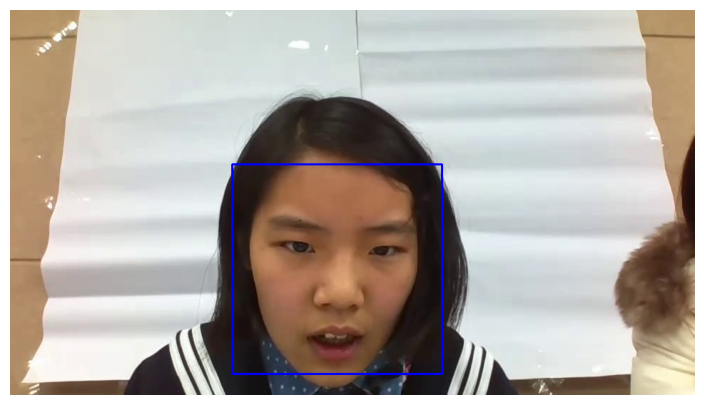

In [56]:
# Visualización de la imagen con un bounding box
import matplotlib.pyplot as plt


img = cv2.cvtColor(imagen,cv2.COLOR_RGB2BGR)

plt.figure(figsize=(10,5))
plt.imshow(img)
plt.axis('off')

In [57]:
dir_list = os.listdir("bounding_box")
# Se almacena la cuenta de pixeles blancos de las imagenes en una lista
print(dir_list)
for i in dir_list:
    image = cv2.imread("bounding_box\\" + i)
    # print("C:\\Users\\jpret\\OneDrive\\Escritorio\\seminario_stuff\\frames\\" + i)
    aux = count_edges(image)
    canny_list.append(aux)

['frame_120_bounding-box.jpg', 'frame_150_bounding-box.jpg', 'frame_180_bounding-box.jpg', 'frame_210_bounding-box.jpg', 'frame_240_bounding-box.jpg', 'frame_270_bounding-box.jpg', 'frame_300_bounding-box.jpg', 'frame_30_bounding-box.jpg', 'frame_60_bounding-box.jpg', 'frame_90_bounding-box.jpg']


In [58]:

tuplas = zip(canny_list, dir_list)

#Se ordenan las listas en base a 
tuplas_2 = sorted(tuplas, key=lambda x: x[0])

# Desempaqueta las listas ordenadas
list_1 = [x[0] for x in tuplas_2]
list_2 = [x[1] for x in tuplas_2]

print("Listado de frames:", list_2)
print("Listado de los pixeles blancos (Detector de bordes Canny):", list_1)

Listado de frames: ['frame_120_bounding-box.jpg', 'frame_30_bounding-box.jpg', 'frame_60_bounding-box.jpg', 'frame_270_bounding-box.jpg', 'frame_180_bounding-box.jpg', 'frame_150_bounding-box.jpg', 'frame_90_bounding-box.jpg', 'frame_240_bounding-box.jpg', 'frame_300_bounding-box.jpg', 'frame_210_bounding-box.jpg']
Listado de los pixeles blancos (Detector de bordes Canny): [7392, 7487, 7568, 7616, 7672, 7728, 7775, 7937, 7978, 7998]


In [62]:
import os
directory = "white_pixel_list"
name = os.path.join(directory,"border_canny.txt")


if not os.path.exists(directory):
    # Create the directory
    os.makedirs(directory)
    print("El directorio ha sido creado con exito!")
else:
    print("El directorio ya existe!")

# Abrir el archivo en modo escritura
with open(name, "w") as archivo:
    # Escribir cada par de elementos de las listas en una línea del archivo
    for elemento1, elemento2 in zip(list_1, list_2):
        archivo.write(f"{elemento1}->{elemento2} pixeles blancos\n")

print('El frame con mayor detalle es:', list_2[len(list_2)-1])

El directorio ya existe!
El frame con mayor detalle es: frame_210_bounding-box.jpg


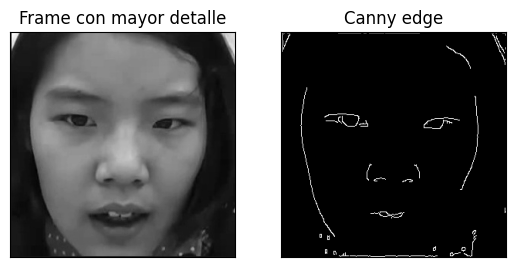

In [61]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
# Visualización del bounding box, junto al detector de bordes aplicado
image = "bounding_box\\"+list_2[len(list_2)-1]
# Bordes del bounding box
img = cv.imread(image, cv.IMREAD_GRAYSCALE)
assert img is not None, "no existe la imagen o directorio"
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Frame con mayor detalle'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Canny edge'), plt.xticks([]), plt.yticks([])
plt.show()